In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB

session = Session(engine)

inspector=inspect(engine)

 
columns=inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])    

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Climate Analysis

In [10]:
columns=inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
obj = session.query(Measurement).order_by(Measurement.date.desc()).first()

obj.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1e4ca573b00>,
 'prcp': 0.0,
 'station': 'USC00519397',
 'tobs': 81.0,
 'date': '2017-08-23',
 'id': 2724}

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#  Calculate the date 1 year ago from the last data point in the database
obj = session.query(Measurement).order_by(Measurement.date.desc()).first()

obj.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1e4ca573b00>,
 'prcp': 0.0,
 'station': 'USC00519397',
 'tobs': 81.0,
 'date': '2017-08-23',
 'id': 2724}

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_twelve = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date<='2017-08-23').filter(Measurement.date>='2016-08-24').order_by(Measurement.date.asc()).all()

for record in last_twelve:
    (date, prcp) = record
    print(date)
    print(prcp)
    



2016-08-24
0.08
2016-08-24
2.15
2016-08-24
2.28
2016-08-24
None
2016-08-24
1.22
2016-08-24
2.15
2016-08-24
1.45
2016-08-25
0.08
2016-08-25
0.08
2016-08-25
0.0
2016-08-25
0.0
2016-08-25
0.21
2016-08-25
0.06
2016-08-25
0.11
2016-08-26
0.0
2016-08-26
0.03
2016-08-26
0.02
2016-08-26
0.04
2016-08-26
0.0
2016-08-26
0.01
2016-08-27
0.0
2016-08-27
0.18
2016-08-27
0.02
2016-08-27
0.0
2016-08-27
0.12
2016-08-27
None
2016-08-28
0.01
2016-08-28
0.14
2016-08-28
0.14
2016-08-28
0.14
2016-08-28
0.6
2016-08-28
2.07
2016-08-29
0.0
2016-08-29
0.17
2016-08-29
0.04
2016-08-29
None
2016-08-29
0.0
2016-08-29
0.35
2016-08-29
0.9
2016-08-30
0.0
2016-08-30
0.0
2016-08-30
0.02
2016-08-30
0.0
2016-08-30
0.0
2016-08-30
0.05
2016-08-31
0.13
2016-08-31
0.1
2016-08-31
None
2016-08-31
None
2016-08-31
0.25
2016-08-31
0.24
2016-08-31
2.46
2016-09-01
0.0
2016-09-01
0.0
2016-09-01
0.0
2016-09-01
None
2016-09-01
0.02
2016-09-01
0.01
2016-09-02
0.0
2016-09-02
0.02
2016-09-02
0.19
2016-09-02
None
2016-09-02
None
2016-09-02


2017-04-28
0.0
2017-04-28
0.76
2017-04-28
0.79
2017-04-29
0.12
2017-04-29
0.35
2017-04-29
0.95
2017-04-29
6.25
2017-04-29
0.37
2017-04-29
0.0
2017-04-30
0.89
2017-04-30
1.21
2017-04-30
1.17
2017-04-30
1.31
2017-04-30
1.04
2017-04-30
0.8
2017-05-01
0.26
2017-05-01
0.07
2017-05-01
0.03
2017-05-01
0.07
2017-05-01
0.13
2017-05-01
0.25
2017-05-02
0.0
2017-05-02
0.03
2017-05-02
0.01
2017-05-02
0.0
2017-05-02
0.01
2017-05-02
0.0
2017-05-03
0.0
2017-05-03
0.01
2017-05-03
0.01
2017-05-03
0.0
2017-05-03
0.01
2017-05-04
0.0
2017-05-04
0.0
2017-05-04
0.08
2017-05-04
0.0
2017-05-04
0.0
2017-05-04
None
2017-05-05
0.0
2017-05-05
0.0
2017-05-05
0.28
2017-05-05
0.0
2017-05-05
0.0
2017-05-05
0.1
2017-05-06
0.0
2017-05-06
0.0
2017-05-06
0.06
2017-05-06
0.0
2017-05-06
0.0
2017-05-06
0.0
2017-05-07
0.0
2017-05-07
0.07
2017-05-07
0.0
2017-05-07
0.02
2017-05-07
0.03
2017-05-08
0.0
2017-05-08
0.22
2017-05-08
0.95
2017-05-08
0.0
2017-05-08
0.73
2017-05-08
1.11
2017-05-09
1.62
2017-05-09
0.52
2017-05-09
0.68
20

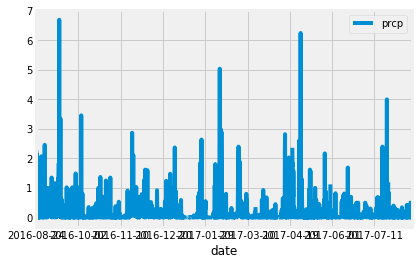

In [14]:
# Sort the dataframe by date
#sorted in original query
# Use Pandas Plotting with Matplotlib to plot the data

df = pd.DataFrame(last_twelve, columns=['date', 'prcp'])

# df.head()
df.set_index('date', inplace=True)

df.plot()
# df.xaxis.label.set_visible(False)
plt.show()


![precipitation](Images/precipitation.png)

In [15]:
df.prcp.describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.prcp.describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

![describe](Images/describe.png)

In [36]:
# Design a query to show how many stations are available in this dataset?
count_station = session.query(func.count(Station.station))

for record in count_station:
    (station) = record
    print(station)




(9,)


In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_active=session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc())

# station_count = session.query(Measurement.station, Measurement.id).group_by(Measurement.id).count()

# obj.__dict__
list(station_active)

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
last_twelve = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date<='2017-08-23').filter(Measurement.date>='2016-08-24').order_by(Measurement.date.asc()).all()

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
min_temp=session.query(Measurement.station, func.min(Measurement.tobs)).\
filter(Measurement.station=='USC00519281')

list(min_temp)


[('USC00519281', 54.0)]

In [22]:
#highest temp
max_temp=session.query(Measurement.station, func.max(Measurement.tobs)).\
filter(Measurement.station=='USC00519281')

list(max_temp)

[('USC00519281', 85.0)]

In [23]:
#average temp
average_temp=session.query(Measurement.station, func.avg(Measurement.tobs)).\
filter(Measurement.station=='USC00519281')

list(average_temp)

[('USC00519281', 71.66378066378067)]

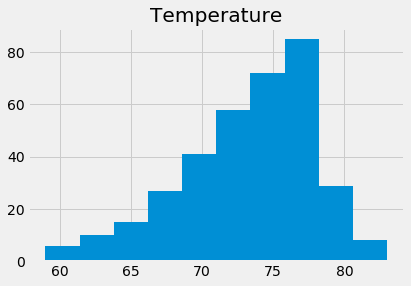

In [34]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature 
# observation data for this station and plot the results as a histogram
last_twelve_temp = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.date<='2017-08-23').filter(Measurement.date>='2016-08-24')\
.filter(Measurement.station=='USC00519281').order_by(Measurement.date.asc()).all()

# Use Pandas Plotting with Matplotlib to plot the data

df_temp = pd.DataFrame(last_twelve_temp, columns=['date', 'Temperature'])

# df.head()


df_temp.hist(label="Temperature")

# df.xaxis.label.set_visible(False)
plt.show()


![precipitation](Images/station-histogram.png)

In [ ]:
#optional

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
